# 关联分析例题

时间        年份  
项目名称     2016 2017 2018 2019  
国民生产总值  55   65   75   100 -----母序列
工业产值     24   28   40   50  -----子序列
农业产值     10   22   18   20  -----子序列

In [1]:
import numpy as np
X=np.array([[55,65,75,100],[24,38,40,50],[10,22,18,20]])
mean=np.sum(X,axis=1)/4
Z=X/mean[:,np.newaxis]
Z

array([[0.74576271, 0.88135593, 1.01694915, 1.3559322 ],
       [0.63157895, 1.        , 1.05263158, 1.31578947],
       [0.57142857, 1.25714286, 1.02857143, 1.14285714]])

In [89]:
Y=np.transpose(Z)

first=abs(Y[:,0]-Y[:,1])
second=abs(Y[:,0]-Y[:,2])
a=max(max(first),max(second))
b=min(min(first),min(second))
first,second,a,b


(array([0.11418376, 0.11864407, 0.03568243, 0.04014273]),
 array([0.17433414, 0.37578692, 0.01162228, 0.21307506]),
 0.3757869249394673,
 0.011622276029055634)

# 求关联度

In [90]:
def calRelationFac(X,a,b):
    X=(a+0.5*b)/(X+0.5*b)
    return X

In [91]:
first_fac=calRelationFac(first,b,a)
second_fac=calRelationFac(second,b,a)
first_fac,second_fac

(array([0.66047924, 0.65086888, 0.89238486, 0.87493014]),
 array([0.55080214, 0.35395189, 1.        , 0.49758454]))

## 求关联度

In [92]:
def calRelation(X):
    return sum(X)/len(X)


In [93]:
if calRelation(first_fac)>calRelation(second_fac):
    print(calRelation(first_fac))
else:
    print(calRelation(second_fac))

0.7696657818674999


# 灰色关联综合评价

候选人 颜值 争吵次数 身高 体重
A     9    10     175 120
B     8    7      164 80
C     6    3      157 90

In [94]:
# 数据正向化：把所有的数据都改为极大型

from Maxlize import midToMax,regToMax,minToMax
wife=np.array([[9,10,175,120],[8,7,164,80],[6,3,157,90]])
a=wife[:,0]
b=minToMax(10,wife[:,1])
c=midToMax(165,wife[:,2])
d=regToMax(90,100,wife[:,3])
a=a.reshape(-1,1)
a=np.hstack((a,b.reshape(-1,1)))
a=np.hstack((a,c.reshape(-1,1)))
a=np.hstack((a,d.reshape(-1,1)))
a

array([[9. , 0. , 0. , 0. ],
       [8. , 3. , 0.9, 0.5],
       [6. , 7. , 0.2, 1. ]])

In [95]:
# 数据标准化
mean_wife=np.sum(a,axis=0)/3
Z_new=a/mean_wife
Z_new

array([[1.17391304, 0.        , 0.        , 0.        ],
       [1.04347826, 0.9       , 2.45454545, 1.        ],
       [0.7826087 , 2.1       , 0.54545455, 2.        ]])

In [96]:
# 构造母序列：选取每一行中的最大值作为因变量（母序列）
mother_seq=np.max(Z_new,axis=1)
mother_seq=np.hstack((mother_seq[:,np.newaxis],Z_new))
mother_seq

array([[1.17391304, 1.17391304, 0.        , 0.        , 0.        ],
       [2.45454545, 1.04347826, 0.9       , 2.45454545, 1.        ],
       [2.1       , 0.7826087 , 2.1       , 0.54545455, 2.        ]])

In [97]:
# 测量每个值与母序列的差值
m,n=mother_seq.shape
n=n-1
answer=np.zeros((m,n))
for i in range(m):
    for j in range(n):
        answer[i,j]=abs(mother_seq[i,0]-mother_seq[i,j+1])
print(answer)

[[0.         1.17391304 1.17391304 1.17391304]
 [1.41106719 1.55454545 0.         1.45454545]
 [1.3173913  0.         1.55454545 0.1       ]]


In [98]:
# 选择极大差和极小差
a_new=np.min(answer)
b_new=np.max(answer)
a_new,b_new

(0.0, 1.5545454545454547)

In [99]:
# 计算相关系数
relationFactor=calRelationFac(answer,a_new,b_new)
relationFactor

array([[1.        , 0.39835916, 0.39835916, 0.39835916],
       [0.3551883 , 0.33333333, 1.        , 0.34826884],
       [0.37107274, 1.        , 0.33333333, 0.88601036]])

In [100]:
# 计算关联权重
relationValue=calRelation(relationFactor)
relationValue

array([0.57542035, 0.57723083, 0.57723083, 0.54421279])

In [101]:
# 归一化
relation=relationValue/(np.sum(relationValue))
relation

array([0.2530327 , 0.25382883, 0.25382883, 0.23930963])

In [102]:
# 计算获胜的可能性
ans=np.dot(Z_new,relation)
ans=ans/(np.sum(ans))
ans

array([0.0990128 , 0.45160804, 0.44937917])

可以看到，2号获胜的概率最大

# GrayModel

### 长江水质污染预测
长江在1995到2004年废水排污总量如下，若不采取保护措施，对今后污水发展做出预测
年份    1995 1996 1997 1998 1999 2000 2001   2002 2003 2004
排污量   174  179  183  189  207  234  220.5  256  270  285


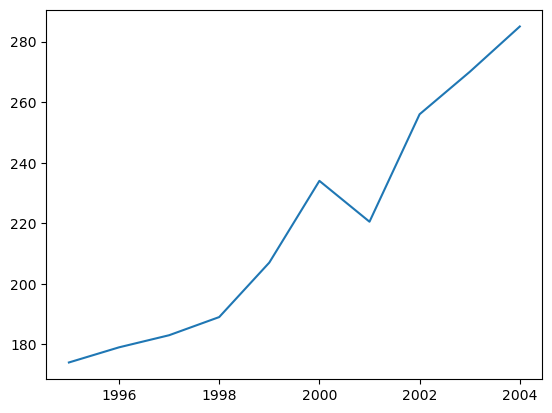

In [8]:
import matplotlib.pyplot as plt
Y=np.array([1995,1996,1997,1998,1999,2000,2001,2002,2003,2004])
X=np.array([174,179, 183, 189, 207, 234, 220.5,  256,  270 , 285])
plt.plot(Y,X)
plt.show()

可以看到，数据没有明显规律，数据量也较少，且按**年份**规律分布。可以使用灰色预测

In [9]:
# 手动构建规律
X_1=np.cumsum(X)
X_1

array([ 174. ,  353. ,  536. ,  725. ,  932. , 1166. , 1386.5, 1642.5,
       1912.5, 2197.5])

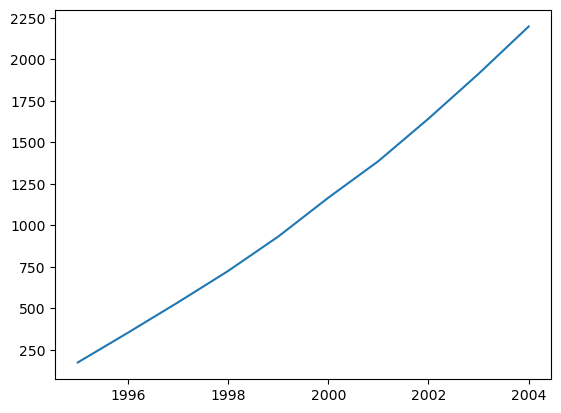

In [10]:
plt.plot(Y,X_1)
plt.show()

此时可以看到曲线较为平滑

为了消除随机性，对数据做如下处理

In [37]:
Z=np.zeros(len(X_1))
Z[0]=X_1[0]
for i in range(len(X_1)-1):
    Z[i+1]=0.5*X_1[i+1]+0.5*X_1[i]

Z=np.array([Z])
Z=Z.reshape(-1,1)
X=X.reshape(-1,1)
Z,X

(array([[ 174.  ],
        [ 263.5 ],
        [ 444.5 ],
        [ 630.5 ],
        [ 828.5 ],
        [1049.  ],
        [1276.25],
        [1514.5 ],
        [1777.5 ],
        [2055.  ]]),
 array([[174. ],
        [179. ],
        [183. ],
        [189. ],
        [207. ],
        [234. ],
        [220.5],
        [256. ],
        [270. ],
        [285. ]]))

In [29]:
np.linalg.inv(np.dot(np.transpose(Z),Z))

array([[7.25337392e-08]])

In [38]:
np.dot(np.transpose(Z),X)

array([[2429641.125]])

求出X=-aZ+u中a和u的值

In [39]:
def ordinaryLeastSquares(X,Y):
    # 最小二乘法的原理是尽可能使得观察值y'与真实值y的偏差量小，使用偏差的平方和作为标准，平方和求导为0时平方和最小，求出此时拟合直线斜率和截距即可
    k=(len(X)*sum(X*Y)-sum(X)*sum(Y))/(len(X)*sum(X*X)-sum(X)**2)
    b=Y.mean()-k*X.mean()
    return k,b

In [40]:
k,b=ordinaryLeastSquares(Z,X)
k,b

(array([0.06096252]), array([158.70670512]))

此时可以得到 a=-k u=b
将其带回常微分方程
可以得到
$x_{predict}^{(1)}(m+1)=[x^{(0)}(1)-\frac{u}{a}]e^{-am}+\frac{u}{a},m=1,2,...,n-1$
于是可以得到
$x_{predict}^{(0)}(m+1)=(1-e^a)[x^{(0)}(1)-\frac{u}{a}]e^{-am}$

In [41]:
a=-k
u=b
# 第十一年的数据为:
x_11=(1-np.power(np.e,a))*(X[0]-u/a)*np.power(np.e,-a*10)
x_11

array([302.18966352])

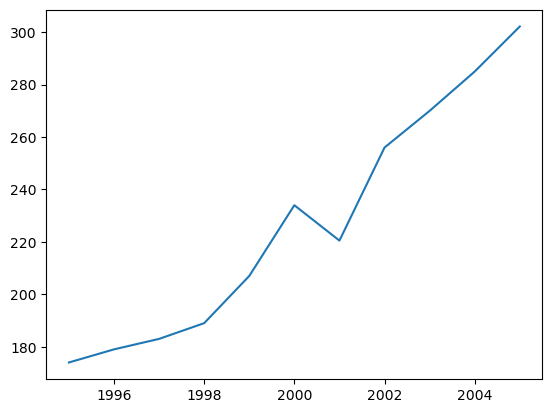

In [45]:
X=X.reshape(-1,1)
X=np.vstack((X,x_11))
Y=Y.reshape(-1,1)
Y=np.vstack((Y,[2005]))
plt.plot(Y,X)
plt.show()